<div style="text-align:center; background-image:url('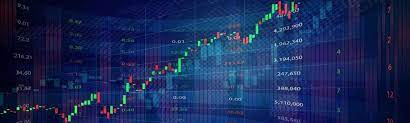'); background-size:cover; padding:10px; font-weight:bold; color:blue; text-shadow:3px 3px 5px #333; border: 2px black;">
    <h1 style="font-weight:bold; color:white; text-shadow:3px 3px 5px #333;">Stock Price Prediction</h1>
    <div style="text-align: justify; padding: 10px; color: white;background-color: rgba(0, 0, 0, 0.5);">
    The key objective of this project is to make prediction of stock prices using time series technique, for which here i've chosen Tata Motors company which is a leading automobile Indian company.
</div>
     <div style="text-align: justify; padding: 10px; color: white;background-color: rgba(0, 0, 0, 0.5);">
    Seeing people gradually taking interest in stock market in India has motivated me in taking this project, the goal is driven by the need to provide investors, traders, and stakeholders with reliable forecasts for stock prices.
</div>
     <div style="text-align: justify; padding: 10px; color: white;background-color: rgba(0, 0, 0, 0.5);">
  The accurate prediction of stock prices will enable the investor to make well-informed decisions in current dynamic market. Effective forecasting will also helps in managing risks associated with stock market investments, contributing to more strategic financial planning.
</div>
</div>


 <div style="text-align:Left; background-color:rgb(128,128,128);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Importing Libraries</p>

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

 <div style="text-align:Left; background-color:rgb(128,128,128);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Reading Historical Stock Data CSV file</p>

In [2]:
# Read the csv file
df=pd.read_csv("C:\\Users\\super\\Desktop\\Project VIVA\\Project Work\\Project Work\\Stock Price Prediction\\TATAMOTORS_data.csv",parse_dates=True)

In [3]:
# Shape of DataFrame
df.shape

(1233, 7)

In [4]:
# DataFrame fields & top rows
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-15,414.299988,417.549988,407.000000,408.649994,408.649994,9867270
1,2017-11-16,411.350006,415.899994,411.350006,413.450012,413.450012,6291441
2,2017-11-17,419.450012,423.450012,417.000000,421.799988,421.799988,6191428


In [5]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1233 non-null   object 
 1   Open       1233 non-null   float64
 2   High       1233 non-null   float64
 3   Low        1233 non-null   float64
 4   Close      1233 non-null   float64
 5   Adj Close  1233 non-null   float64
 6   Volume     1233 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.6+ KB


 <div style="text-align:Left; background-color:rgb(128,128,128);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Setting "Date" as Index</p>

In [6]:
# Set Date as index
df.set_index('Date', inplace=True)
# convert it to datetime format
df.index = pd.to_datetime(df.index, format = "%Y-%m-%d")
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-15,414.299988,417.549988,407.000000,408.649994,408.649994,9867270
2017-11-16,411.350006,415.899994,411.350006,413.450012,413.450012,6291441
2017-11-17,419.450012,423.450012,417.000000,421.799988,421.799988,6191428
2017-11-20,421.000000,425.700012,420.100006,423.000000,423.000000,4051153
2017-11-21,424.450012,430.000000,422.500000,424.250000,424.250000,6745407
...,...,...,...,...,...,...
2022-11-04,418.200012,426.000000,416.899994,425.350006,425.350006,12277023
2022-11-07,428.250000,437.500000,428.250000,435.000000,435.000000,15058076
2022-11-09,439.200012,441.200012,432.000000,433.149994,433.149994,14471443


 <div style="text-align:Left; background-color:rgb(128,128,128);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Dropping Irrelevant Data</p>

In [7]:
# dropping the 'Adj Close' column from DataFrame
df.drop(['Adj Close'], axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-15,414.299988,417.549988,407.000000,408.649994,9867270
2017-11-16,411.350006,415.899994,411.350006,413.450012,6291441
2017-11-17,419.450012,423.450012,417.000000,421.799988,6191428
2017-11-20,421.000000,425.700012,420.100006,423.000000,4051153
2017-11-21,424.450012,430.000000,422.500000,424.250000,6745407


 <div style="text-align:Left; background-color:rgb(128,128,128);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Analysing Correlation</p>

In [8]:
# Analysing correlation
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999341,0.999269,0.998682,-0.318062
High,0.999341,1.000000,0.999138,0.999504,-0.302008
Low,0.999269,0.999138,1.000000,0.999417,-0.324328
Close,0.998682,0.999504,0.999417,1.000000,-0.309878
Volume,-0.318062,-0.302008,-0.324328,-0.309878,1.000000


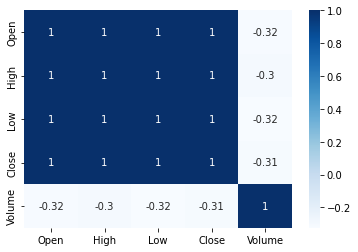

In [9]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="Blues" ,annot=True)  
# displaying heatmap
plt.show()

 <div style="text-align:Left; background-color:rgb(128,128,128);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Time Series Analysis</p>

<Mpf_Figure size 2000x800 with 0 Axes>

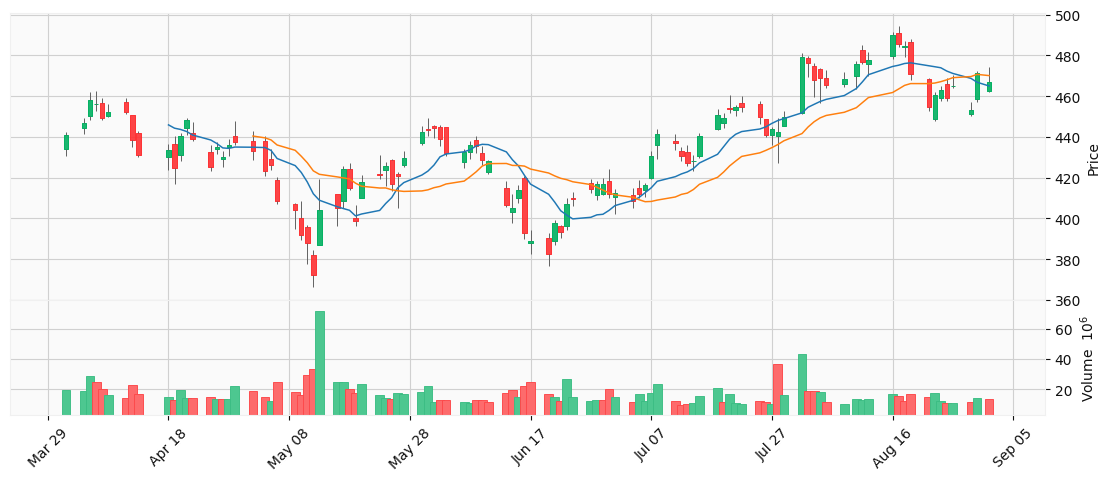

In [10]:
# Candlestick plot to analyse stock data for specific timeframe
ohlc_data = df['2022-04-01':'2022-09-01']
import mplfinance as mpf
fig = mpf.figure(figsize=(20, 8))
mpf.plot(ohlc_data, type='candle', style='yahoo', mav=(10, 20), volume=True, show_nontrading=True, figratio=(20,8))
mpf.show()

Here candlestick shows stock Opening , High, Low, and Closing value of each day.<br>
Red ones shows opening value is greater than the closing value whereas green ones shows that closing value is greater than opening value.<br>
The top and bottom wick part shows the highest and lowest value attained by the stock on a particular day.
Blue color line plot is a plot corresponding to 10 days moving average value variation and orange color is for 20 days moving average value variation.<br>
Bar Chart shows the volume of stocks on respective days.

<Axes: xlabel='Date'>

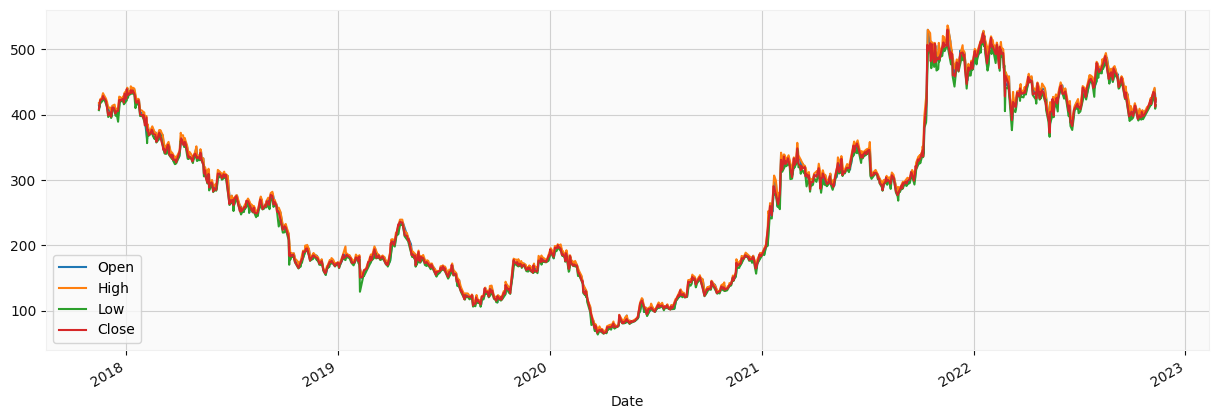

In [11]:
# line plot for seeing the vriations over time
df[["Open","High","Low","Close"]].plot(figsize=(15,5))

Since each attribute is highly correlated, therefore the plots are almost overlapping.

<Axes: xlabel='Date'>

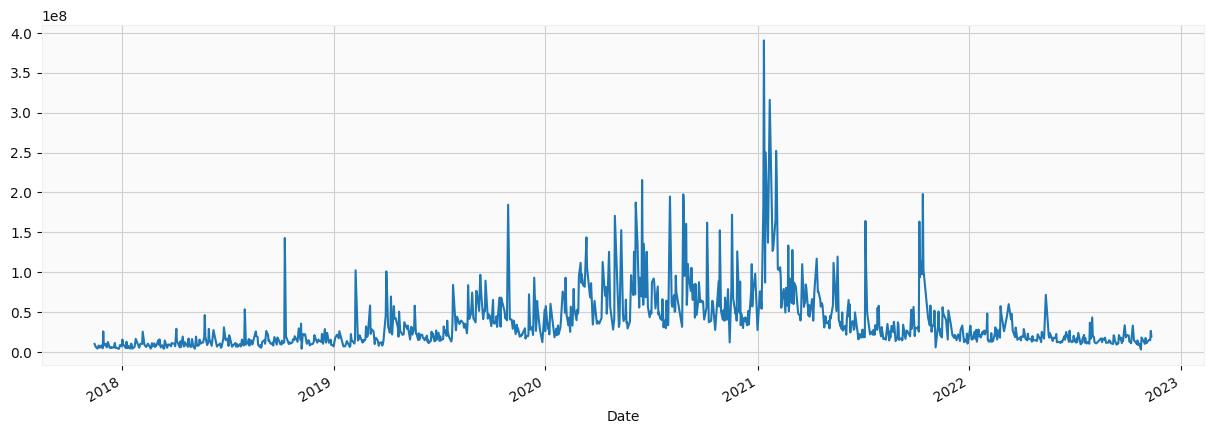

In [12]:
df["Volume"].plot(figsize=(15,5))

<Axes: xlabel='Date'>

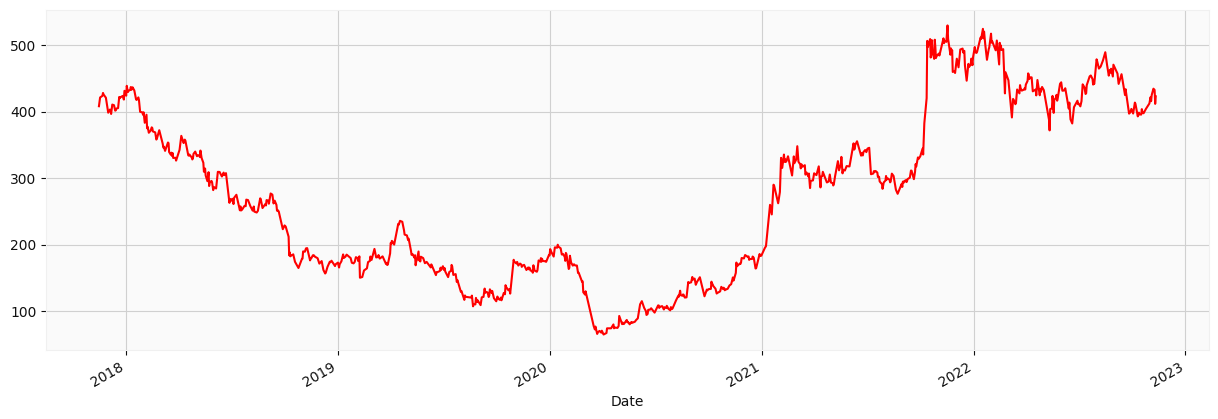

In [13]:
df['Close'].plot(figsize=(15,5),color = "red")

<Axes: xlabel='Date'>

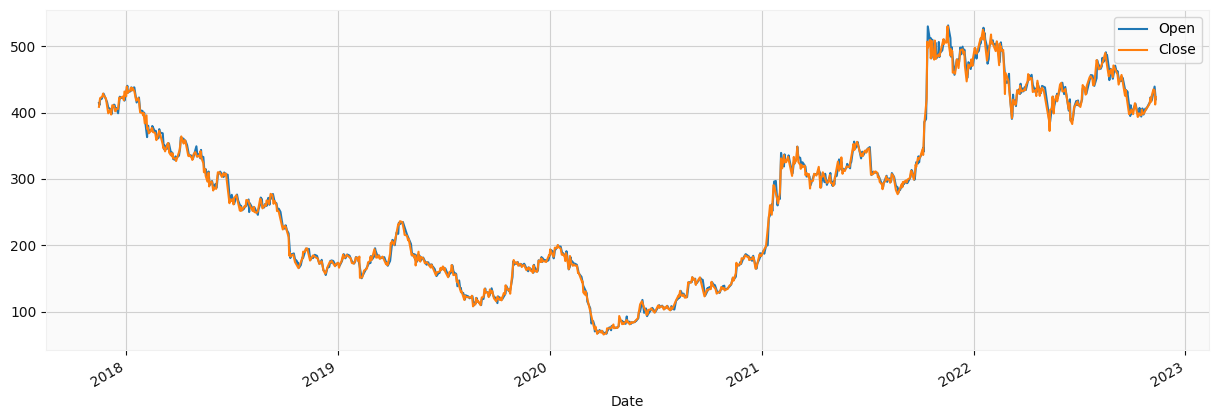

In [14]:
df[['Open','Close']].plot(figsize=(15,5))

<Axes: xlabel='Date'>

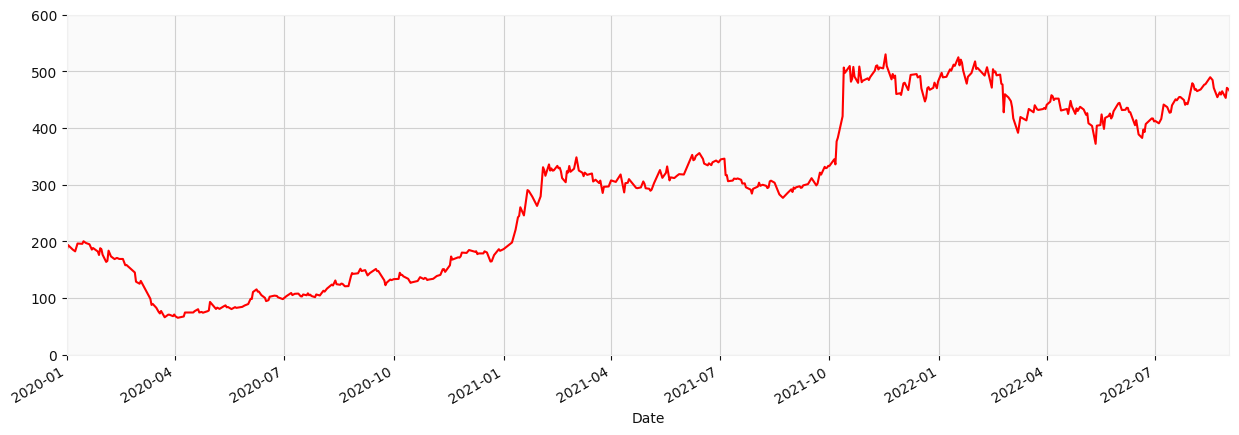

In [15]:
# line plot for subset of dataset
df['Close'].plot(xlim=['2020-01-01','2022-09-01'],ylim=[0,600],figsize=(15,5),color="red")

 <div style="text-align:Left; background-color:rgb(128,128,128);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Resampling</p>

https://machinelearningmastery.com/resample-interpolate-time-series-data-python/<p>

Resampling in time series analysis involves changing the frequency of your time series observations.<br>
There are two types of resampling:<br>
**Upsampling:** Where you increase the frequency of the samples, such as from minutes to seconds.<br>
**Downsampling:** Where you decrease the frequency of the samples, such as from days to months1.Resampling can also be used to transform time series data occurring in irregular time intervals into equispaced data.

**Use Case**
- Downsampling and performing aggregation
- Downsampling with a custom base
- Upsampling and filling values

There are perhaps two main reasons why you may be interested in resampling your time series data:

- **Problem Framing:** Resampling may be required if your data is not available at the same frequency that you want to make predictions.
- **Feature Engineering:** Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.

Link to understand resample() and various rules -
https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

In [16]:
# Year end minimum values of each field through downsampling & aggregation using rule = 'A'
df.resample(rule='A').min()

,Open,High,Low,Close,Volume
Date,,,,,
2017-12-31,398.000000,404.000000,389.299988,397.049988,3673355
2018-12-31,155.000000,159.500000,154.649994,157.100006,3820313
2019-12-31,108.900002,111.599998,106.000000,107.699997,6141180
2020-12-31,66.500000,66.900002,63.500000,65.300003,11749453
2021-12-31,184.949997,187.000000,184.500000,186.500000,5531940
2022-12-31,382.000000,384.649994,366.200012,372.299988,2871205


In [17]:
# Year end minimum & maximum values of each field through downsampling & multiple aggregation using rule = 'A'
df.resample(rule='A').agg(['min','max']) 

Open                    High                     Low  \
                   min         max         min         max         min   
Date                                                                     
2017-12-31  398.000000  428.600006  404.000000  433.450012  389.299988   
2018-12-31  155.000000  440.399994  159.500000  443.500000  154.649994   
2019-12-31  108.900002  235.000000  111.599998  239.350006  106.000000   
2020-12-31   66.500000  199.500000   66.900002  201.699997   63.500000   
2021-12-31  184.949997  531.450012  187.000000  536.700012  184.500000   
2022-12-31  382.000000  527.900024  384.649994  528.500000  366.200012   

                             Close                Volume             
                   max         min         max       min        max  
Date                                                                 
2017-12-31  424.500000  397.049988  431.850006   3673355   25646262  
2018-12-31  433.000000  157.100006  439.299988   3820313  142760251  
2019-12-31  231.699997  107.699997  236.250000   6141180  184435614  
2020-12-31  196.899994   65.300003  200.350006  11749453  215476711  
2021-12-31  520.250000  186.500000  530.150024   5531940  390577839  
2022-12-31  512.000000  372.299988  525.000000   2871205   71425747

<Axes: xlabel='Date'>

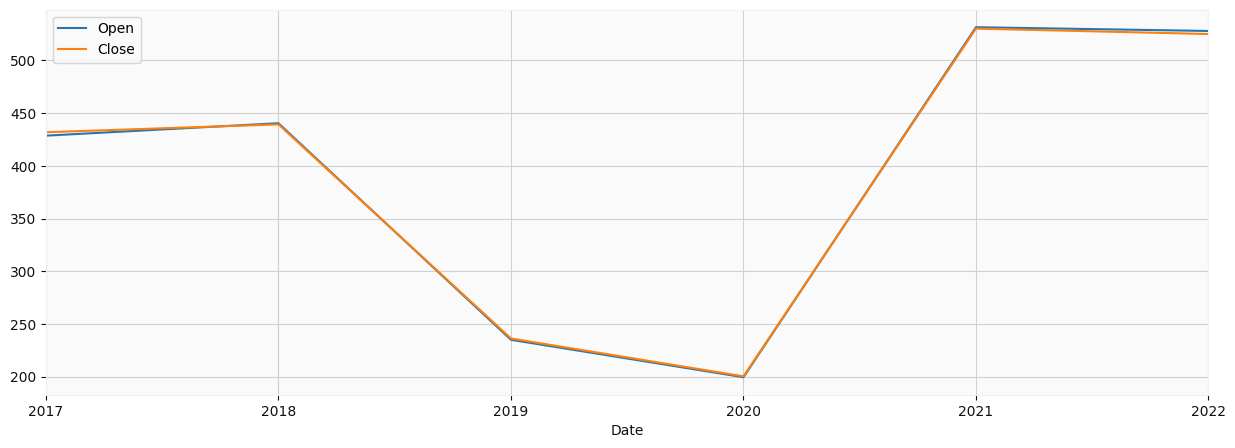

In [18]:
# Plotting year end maximum values of selected field through downsampling & aggregation using rule = 'A'
df.resample(rule='A').max()[['Open','Close']].plot(figsize=(15,5))

In [19]:
# Maximum values of each field through downsampling & aggregation for each quarter using rule = 'QS'
df.resample(rule='QS').max()

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-01,428.600006,433.450012,424.500000,431.850006,25646262
2018-01-01,440.399994,443.500000,433.000000,439.299988,25294860
2018-04-01,362.600006,372.350006,359.799988,364.100006,46104103
2018-07-01,277.250000,282.000000,272.899994,277.399994,53282545
2018-10-01,230.000000,232.800003,225.800003,229.350006,142760251
2019-01-01,195.399994,198.350006,187.800003,194.050003,102256857
2019-04-01,235.000000,239.350006,231.699997,236.250000,100834335
2019-07-01,170.000000,172.350006,166.300003,170.000000,96568372
2019-10-01,184.000000,187.899994,181.550003,185.149994,184435614


<Axes: xlabel='Date'>

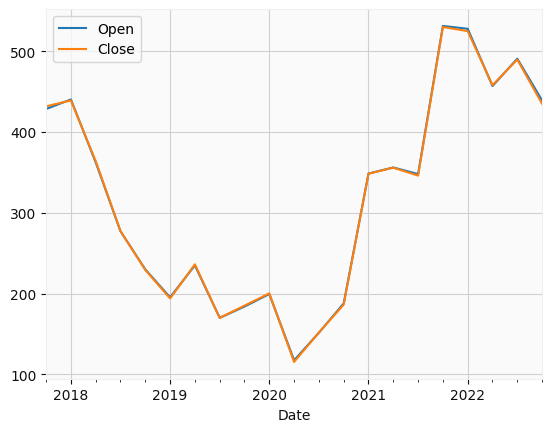

In [20]:
# Plotting selected columns maximum values of each field through downsampling & aggregation for each quarter using rule = 'QS'
df.resample(rule='QS').max()[['Open','Close']].plot()

<Axes: xlabel='Date'>

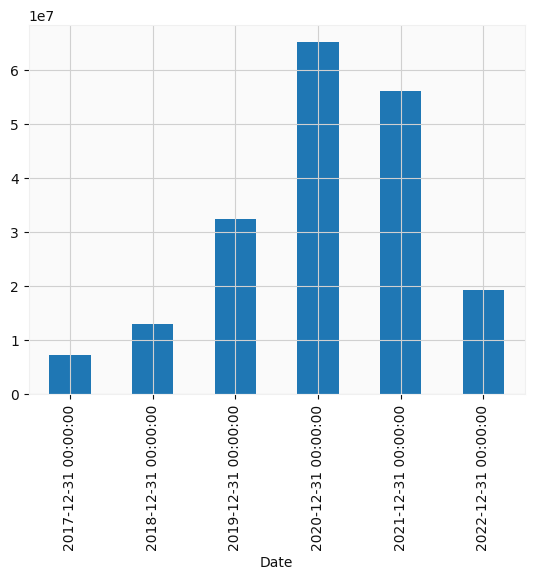

In [21]:
# Average sales of stock at the end of each year
df['Volume'].resample(rule='A').mean().plot(kind='bar')

 <div style="text-align:Left; background-color:rgb(128,128,128);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Rolling Function: Used for Smoothing</p>

 <div style="text-align:Left; background-color:rgb(190,190,190);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Simple Moving Average (SMA)</p>

The Simple Moving Average (SMA) calculates the unweighted mean of the previous M points. We prefer selecting sliding
window data points based on the amount of smoothing, as increasing the value of M improves smoothing but reduces
accuracy.

In [22]:
df['Close'].rolling(3).mean().head(6)

Date
2017-11-15           NaN
2017-11-16           NaN
2017-11-17    414.633331
2017-11-20    419.416667
2017-11-21    423.016663
2017-11-22    425.283335
Name: Close, dtype: float64

In [23]:
# simple moving average
df['Close:2 days rolling']=df['Close'].rolling(2).mean()
df['Close:5 days rolling']=df['Close'].rolling(5).mean()
df['Close:7 days rolling']=df['Close'].rolling(7).mean()
df['Close:10 days rolling']=df['Close'].rolling(10).mean()
df['Close:30 days rolling']=df['Close'].rolling(30).mean()
df['Close:50 days rolling']=df['Close'].rolling(50).mean()

<Axes: xlabel='Date'>

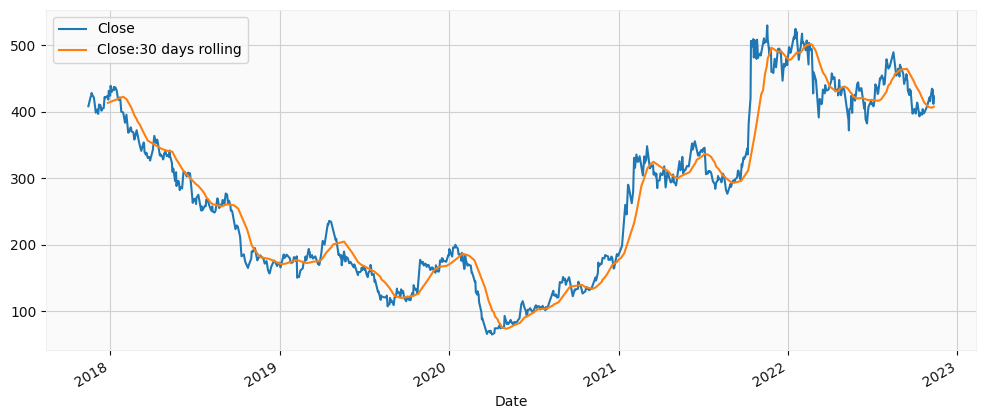

In [24]:
df[['Close','Close:30 days rolling']].plot(figsize=(12,5))

<Axes: xlabel='Date'>

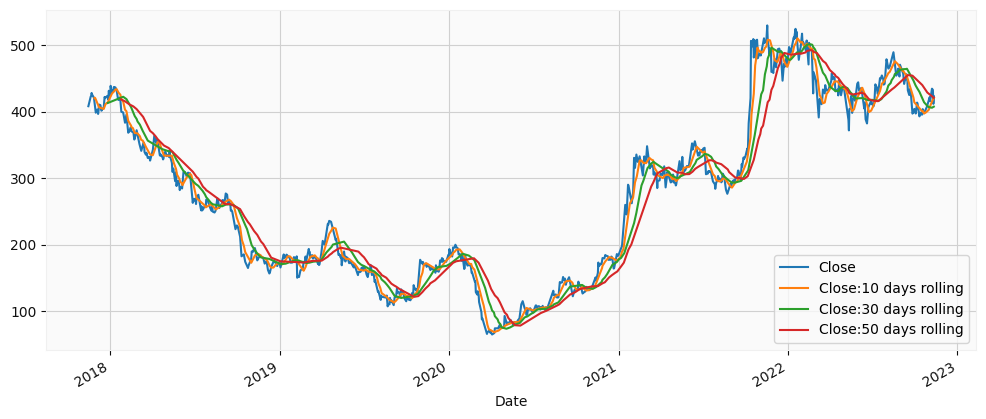

In [25]:
df[['Close','Close:10 days rolling','Close:30 days rolling','Close:50 days rolling']].plot(figsize=(12,5))

Smoothing curve tells us when to buy and when to sell stock

 <div style="text-align:Left; background-color:rgb(190,190,190);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Cumulative Moving Average (CMA)</p>

The CMA is the unweighted mean of past values till the current time.

<Axes: xlabel='Date'>

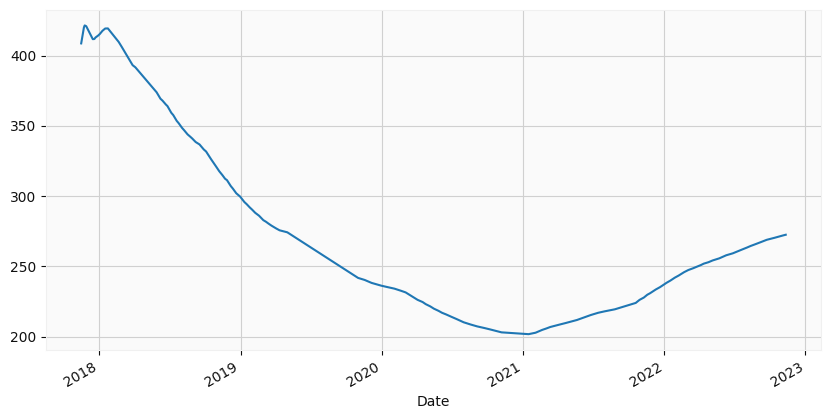

In [26]:
# cumulative moving average(here I use for only open stock)
# use expanding
df['Close'].expanding().mean().plot(figsize=(10,5))

 <div style="text-align:Left; background-color:rgb(190,190,190);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Exponential Moving Average (EMA)</p>

EMA is mainly used to identify trends and filter out noise. The weight of elements is decreased gradually over time. This means it gives weight to recent data points, not historical ones. Compared with SMA, the EMA is faster to change and more sensitive.<br>
α –>Smoothing Factor.<br>
It has a value between 0,1.<br>
Represents the weighting applied to the very recent period.

In [27]:
#  exponential moving average
df['EMA_0.1'] = df['Close'].ewm(alpha=0.1, adjust=False).mean()
df['EMA_0.3'] = df['Close'].ewm(alpha=0.3, adjust=False).mean()

<Axes: xlabel='Date'>

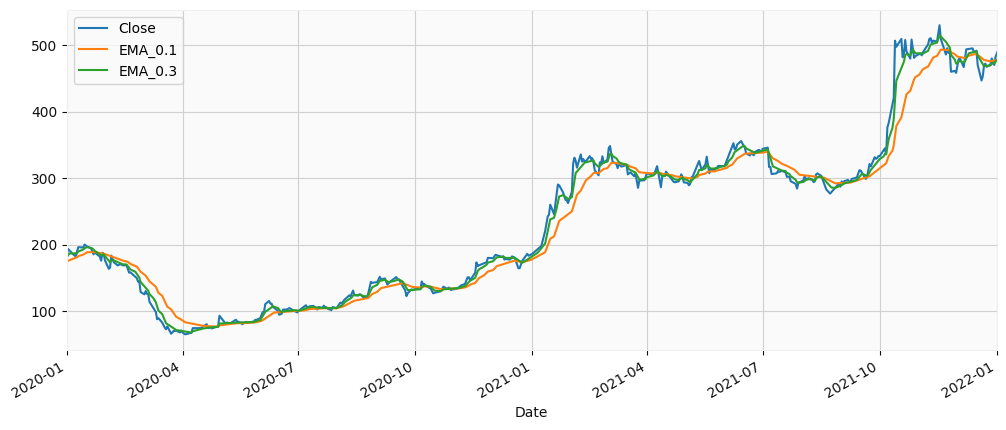

In [28]:
df[['Close','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2022-01-01'],figsize=(12,5))

 <div style="text-align:Left; background-color:rgb(128,128,128);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Stationarity Check</p>

### Stationary Data
In the context of time series analysis, refers to data that exhibits consistent statistical properties over time. In other words, the statistical properties of stationary data do not change with time. Stationarity is an important concept in time series analysis because many time series forecasting methods and models assume that the data is stationary or can be transformed into a stationary form.<br>
Time series is said to be stationary when it has:
- Constant mean with respect to given time frame.
- Constant variance with respect to given time frame.
- Constant autocorrelation over the given period.

There are two tests available to test if the dataset is stationary:
1. **Augmented Dickey-Fuller (ADF) Test**<br>
The ADF test is the most popular statistical test. It is done with the following assumptions:
    - Null Hypothesis (H0): Series is non-stationary
    - Alternate Hypothesis (HA): Series is stationary
        - p-value >0.05 Fail to reject (H0)
        - p-value <= 0.05 Accept (H1)

2. **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test**<br>
    These tests are used for testing a NULL Hypothesis (HO) that will perceive the time series as stationary around a deterministic trend against the alternative of a unit root.
    
Reference: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/

In [29]:
# since it is seasonal data we are going to use dickey fuller test
from statsmodels.tsa.stattools import adfuller
# Creating a function for printing the output of ADF test as per p-value
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [30]:
df1=pd.read_csv("C:\\Users\\super\\Desktop\\Project VIVA\\Project Work\\Project Work\\Stock Price Prediction\\TATAMOTORS_data.csv",parse_dates = True, index_col='Date')
df1.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-15,414.299988,417.549988,407.000000,408.649994,408.649994,9867270
2017-11-16,411.350006,415.899994,411.350006,413.450012,413.450012,6291441
2017-11-17,419.450012,423.450012,417.000000,421.799988,421.799988,6191428


In [31]:
adf_test(df1['Close'])

ADF Statistics: -1.149024444055935
p- value: 0.6951311109960281
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


To work with time series data, it is often necessary to transform non-stationary data into a stationary form. Common techniques for achieving stationarity include:<br>
**Differencing**: This involves taking the difference between consecutive data points to remove trends or seasonality.<br>
**Logarithmic Transformation**: Applying a logarithmic transformation can stabilize the variance in the data.<br>
**Seasonal Decomposition**: Decomposing the time series into trend, seasonality, and residuals components to work with each separately.

In [32]:
## Used Technique: Differencing 
df1['first_diff_Close']=df1['Close']-df1['Close'].shift(1)
df1.head()

,Open,High,Low,Close,Adj Close,Volume,first_diff_Close
Date,,,,,,,
2017-11-15,414.299988,417.549988,407.000000,408.649994,408.649994,9867270,NaN
2017-11-16,411.350006,415.899994,411.350006,413.450012,413.450012,6291441,4.800018
2017-11-17,419.450012,423.450012,417.000000,421.799988,421.799988,6191428,8.349976
2017-11-20,421.000000,425.700012,420.100006,423.000000,423.000000,4051153,1.200012
2017-11-21,424.450012,430.000000,422.500000,424.250000,424.250000,6745407,1.250000


In [33]:
adf_test(df1['first_diff_Close'].dropna())

ADF Statistics: -9.125982827214395
p- value: 3.1128767444572676e-15
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


 <div style="text-align:Left; background-color:rgb(128,128,128);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">ACF Plot & PACF Plot</p>

In [34]:
# now time to determine p(pacf) and q(acf) value
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

**Order of Autoregressive Terms (p)**:<br>
After differencing, assess the autocorrelation function (ACF) plot of the differenced data.<br>
Look for significant lags in the ACF plot. The lag at which the ACF cuts off is an indicator of the order of autoregressive terms (p).

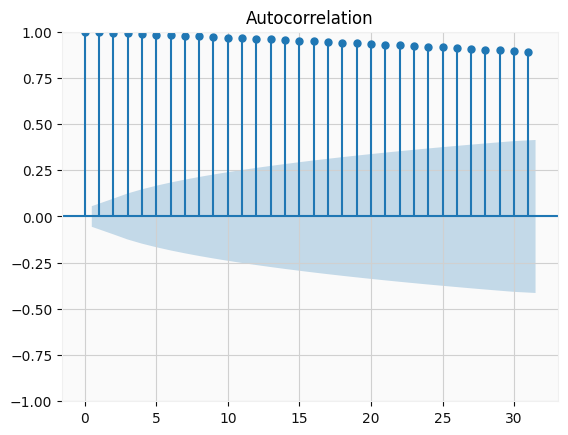

In [35]:
acf = plot_acf(df1["Close"].dropna())

Another tool to determine p is the partial autocorrelation function (PACF) plot. Significant lags in the PACF plot suggest the order of autoregressive terms.<br>
**Order of Moving Average Terms (q)**:<br>
Analyze the partial autocorrelation function (PACF) plot of the differenced data.<br>
Significant lags in the PACF plot suggest the order of moving average terms (q).

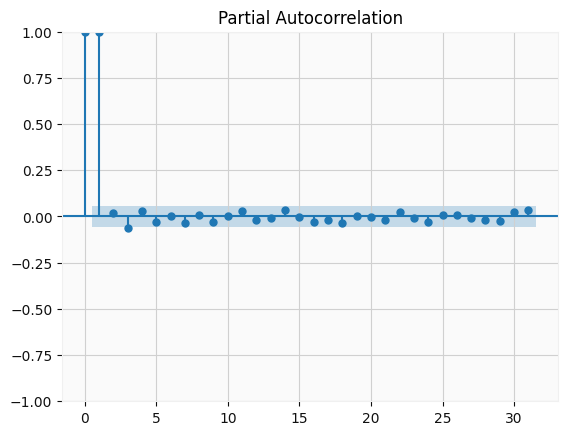

In [36]:
acf12 = plot_pacf(df1["Close"].dropna())

 <div style="text-align:Left; background-color:rgb(128,128,128);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Training Model</p>

**Model Selection**:<br>
   - Choose a range of possible values for p and q based on the ACF and PACF plots.
   - Fit ARIMA models with different combinations of p and q values to the stationary data.
   - Evaluate the models using performance metrics (e.g., AIC, BIC, RMSE) and select the model with the best performance.
   
**Seasonal ARIMA (SARIMA)**:<br>
If your data exhibits seasonality, consider applying a seasonal ARIMA (SARIMA) model in addition to the non-seasonal ARIMA. A seasonal model includes additional seasonal autoregressive and moving average terms.

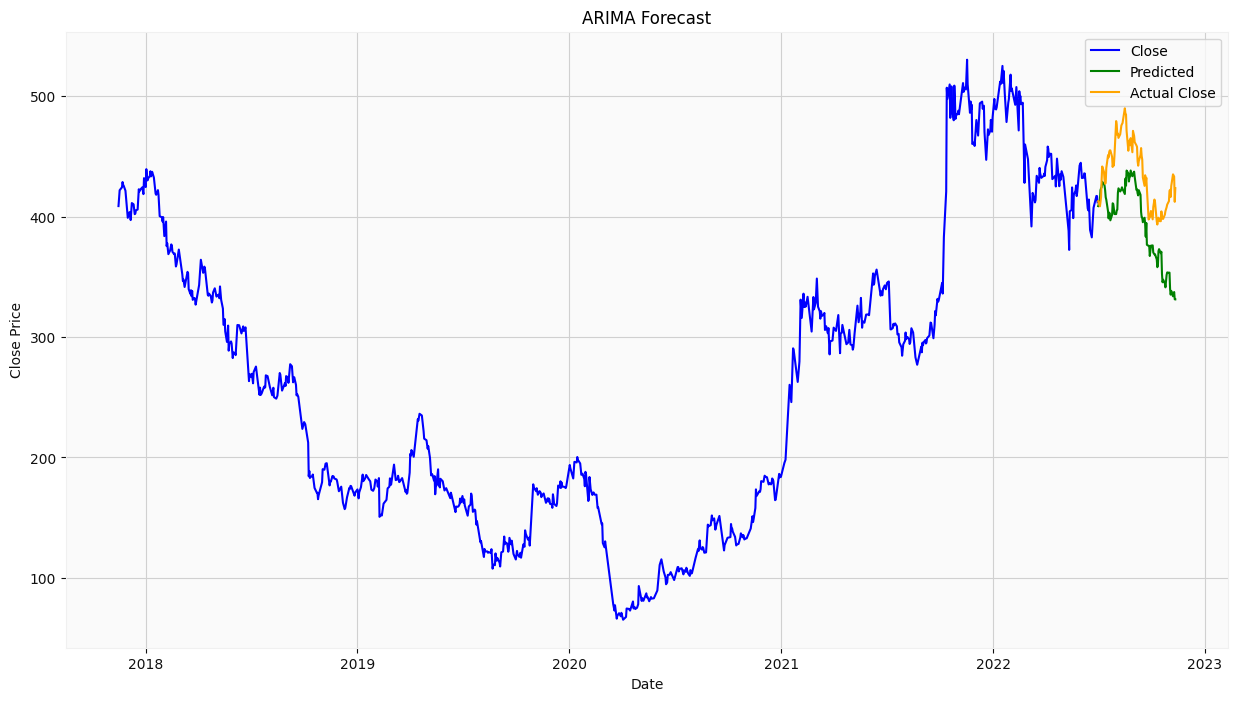

In [37]:
from statsmodels.tsa.arima.model import ARIMA
# Determine the size of your training set and the starting index for testing data
x = len(df1)
size = x - 90  # Adjust the size as needed
index = x - size
train = df1.iloc[:size]
test = df1.iloc[size:]
actual = df1.iloc[size:]

# Create and fit the ARIMA model
model_ar = ARIMA(train['Close'], order=(2, 1, 2))  # Adjust the order as needed
results_ar = model_ar.fit()

# Make predictions for the test set (forecasting)
df_pred_AR = results_ar.predict(start=1, end=index, typ='levels')  # Adjust the start and end as needed

# Plot the results
fig, ax = plt.subplots(figsize=(15, 8))  # Adjust the figure size as needed
ax.plot(train.index, train['Close'].values, label='Close', color='blue')
ax.plot(test.index, df_pred_AR, color='green', label='Predicted')  # Use the test index for predictions
ax.plot(actual.index, actual['Close'].values, label='Actual Close', color='orange')
# Customize the plot as needed
ax.set_title('ARIMA Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()

plt.show()

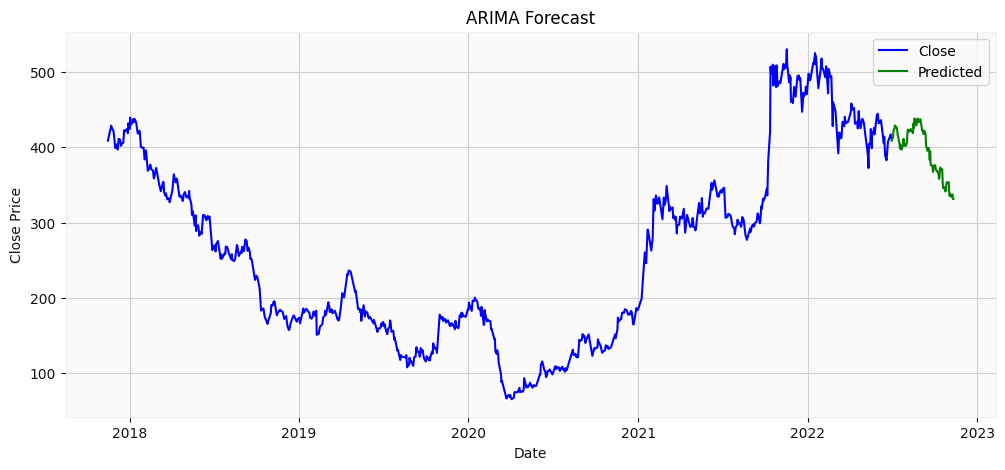

In [38]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 5 ))  # Adjust the figure size as needed
ax.plot(train.index, train['Close'].values, label='Close', color='blue')
ax.plot(test.index, df_pred_AR, color='green', label='Predicted')  # Use the test index for predictions
#ax.plot(actual.index, actual['Close'].values, label='Actual Close', color='orange')
# Customize the plot as needed
ax.set_title('ARIMA Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()

plt.show()

In [39]:
# Predicted values
df_pred_AR

Date
2017-11-16    408.648958
2017-11-17    413.259890
2017-11-20    421.850490
2017-11-21    423.478687
2017-11-22    424.378740
                 ...    
2018-03-21    338.281585
2018-03-22    333.778817
2018-03-23    337.330868
2018-03-26    331.264438
2018-03-27    331.205510
Name: predicted_mean, Length: 90, dtype: float64

In [40]:
# Model Summary
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1143
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3981.980
Date:                Mon, 18 Dec 2023   AIC                           7973.961
Time:                        23:58:46   BIC                           7999.163
Sample:                             0   HQIC                          7983.477
                               - 1143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0640      0.094      0.680      0.496      -0.120       0.248
ar.L2          0.7852      0.087      9.071      0.000       0.616       0.955
ma.L1         -0.0975      0.108     -0.903      0.366      -0.309       0.114
ma.L2         -0.7154      0.099     -7.258      0.000      -0.909      -0.522
sigma2        62.5366      1.265     49.418      0.000      60.056      65.017
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              9289.33
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               3.37   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: ylabel='Density'>

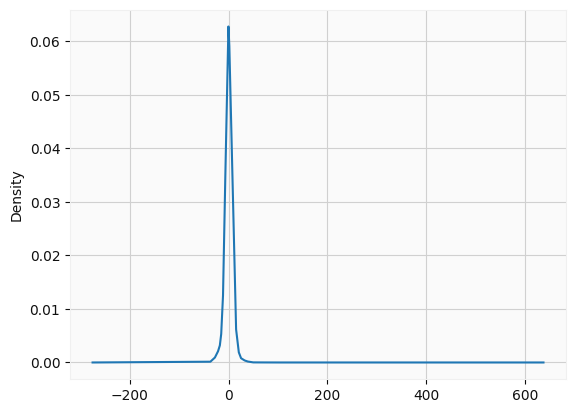

In [41]:
results_ar.resid.plot(kind='kde')

 <div style="text-align:Left; background-color:rgb(128,128,128);padding:4px; font-weight:bold; color:#660000; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Model Evaluation</p>

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [43]:
mse= mean_squared_error(df_pred_AR,test['Close'])
mse

2176.002068875986

In [44]:
rmse= sqrt(mean_squared_error(df_pred_AR,test['Close']))
rmse

46.64763733433866

 <div style="text-align:Left; background-color:rgb(128,128,128);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Using Auto ARIMA for Finding Best Values of p,d,q</p>

AutoARIMA fits a series of ARIMA models to the time series data with different combinations of parameters. It uses a criterion like AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to assess the goodness of fit for each model.

AutoARIMA selects the model with the lowest AIC or BIC value, indicating the best trade-off between model complexity and goodness of fit. The selected model is considered the optimal ARIMA model for the given time series data.

In [45]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [46]:
stepwise_fit = auto_arima(train.Close,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8796.171, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=8401.842, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=8312.355, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=8194.784, Time=0.17 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=8159.749, Time=0.19 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=8119.842, Time=0.25 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.70 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=8121.840, Time=0.55 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 3.714 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1143
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -4053.921
Date:                Mon, 18 Dec 2023   AIC                           8119.842
Time:                        23:58:52   BIC                           8150.080
Sample:                             0   HQIC                          8131.261
                               - 1143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8706      0.017    -50.772      0.000      -0.904      -0.837
ar.L2         -0.6719      0.025    -27.227      0.000      -0.720      -0.624
ar.L3         -0.5663      0.028    -20.355      0.000      -0.621      -0.512
ar.L4         -0.3376      0.026    -13.175      0.000      -0.388      -0.287
ar.L5         -0.1898      0.018    -10.726      0.000      -0.225      -0.155
sigma2        71.3095      1.550     46.009      0.000      68.272      74.347
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):              3310.70
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               3.33   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

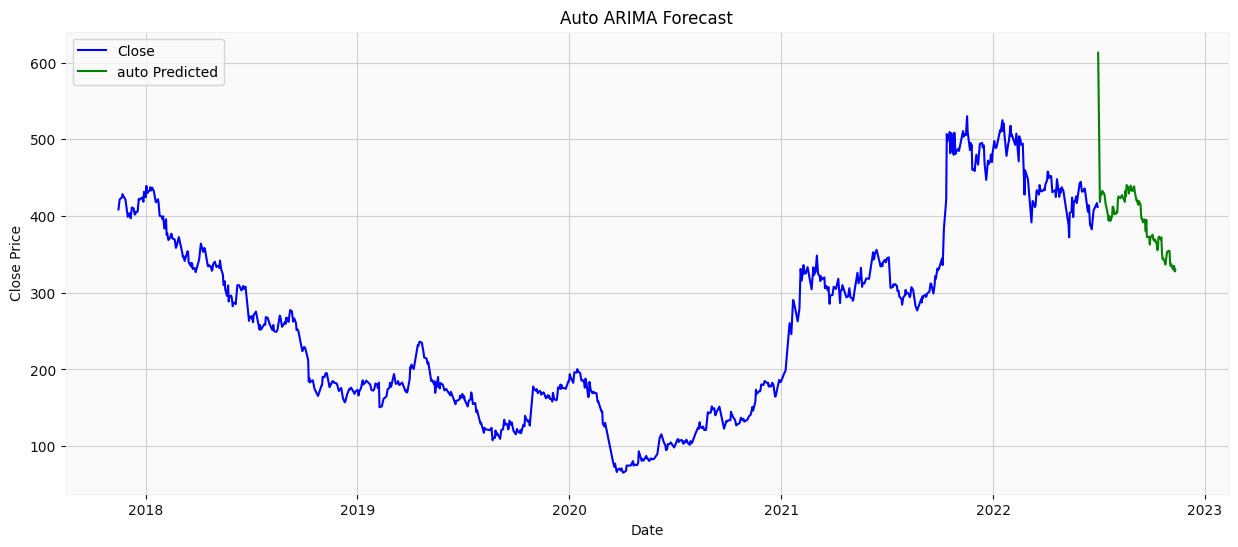

In [47]:
# Create and fit the ARIMA model
model_auto = ARIMA(train['Close'], order=(5,2,0))  # Adjust the order as needed
results_auto = model_auto.fit()

# Make predictions for the test set (forecasting)
df_pred_auto = results_auto.predict(start=1, end=index, typ='levels')  # Adjust the start and end as needed

# Plot the results
fig, ax = plt.subplots(figsize=(15, 6))  # Adjust the figure size as needed
ax.plot(train.index, train['Close'].values, label='Close', color='blue')
ax.plot(test.index, df_pred_auto, color='green', label='auto Predicted')  # Use the test index for predictions
#ax.plot(test.index, df_pred_AR, color='red', label='Predicted')
# Customize the plot as needed
ax.set_title('Auto ARIMA Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()

plt.show()

<Axes: ylabel='Density'>

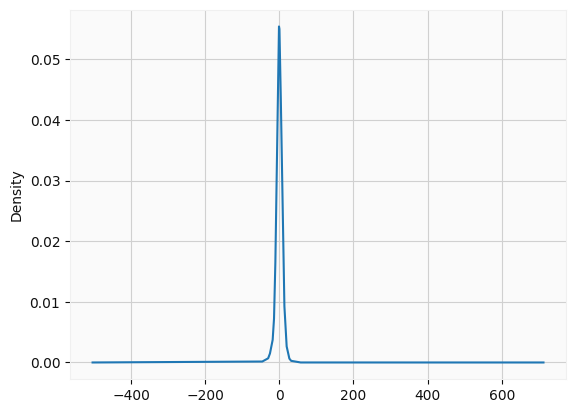

In [48]:
results_auto.resid.plot(kind='kde')

In [49]:
mse_auto= mean_squared_error(df_pred_auto,test['Close'])
mse_auto

2710.8310505837217

In [50]:
rmse_auto= sqrt(mean_squared_error(df_pred_auto,test['Close']))
rmse_auto

52.0656417475452

 <div style="text-align:Left; background-color:rgb(128,128,128);padding:4px; font-weight:bold; color:#D3D3D3; border: 2px black;">
    <p style = "color:white; text-shadow:1px 1px 2px #333;">Conclusions</p>

In [51]:
print("RMSE value for ARIMA model with p=2,d=1,q=2: ",rmse)
print("RMSE value for Auto ARIMA model with p=5,d=2,q=0: ",rmse_auto)

RMSE value for ARIMA model with p=2,d=1,q=2:  46.64763733433866
RMSE value for Auto ARIMA model with p=5,d=2,q=0:  52.0656417475452


Based on RMSE value, ARIMA model with p=2,d=1,q=2 is better model compared to Auto ARIMA model as it has lower value.